# Домашнее задание №3

In [18]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [149]:
data.corr().style.background_gradient(cmap='RdYlGn')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [ ]:
data = data['Total_Bilirubin', 'Direct_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', ]

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [18]:
n = np.array([1,2,3,4,5])
b = np.arr
2 ** n

array([ 2,  4,  8, 16, 32], dtype=int32)

In [ ]:
direct = data.Direct_Bilirubin.to_numpy().reshape(-1,1)
tatal = data.Total_Bilirubin.to_numpy().reshape(-1,1)
res = data.Dataset.to_numpy().reshape(-1,1)
# sns.regplot(x=direct, y=tatal)
x = np.hstack((direct, tatal))
x

In [ ]:
data.Gender = data.Gender.apply(lambda x: 1 if x == 'Male' else 0)
data

In [ ]:
data.iloc[:, :-1]

In [105]:
x = data.iloc[:, :-1].to_numpy()
y = data.Dataset.to_numpy()

In [125]:
y[0]

1

In [100]:
data.dropna(inplace=True)

In [107]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x, y)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [135]:
dft = pd.DataFrame(columns=['real', 'predict'])


In [127]:
dft

,real,predict
1,1,2


In [140]:
dft = pd.DataFrame(columns=['real', 'predict'])
for i in range(len(x)):
    dft.loc[i] = [y[i], log_model.predict(x[i].reshape(1,-1))[0]]


In [142]:
dft['res'] = dft.real == dft.predict

In [134]:
log_model.predict(x[0].reshape(1,-1))[0]

1

In [143]:
dft.head()

,real,predict,res
0,1,1,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,1,True


In [145]:
sum(dft.res) / len(dft)

0.7219343696027634

In [120]:
len(x), len(y), x[0].reshape(1,-1)

(579,
 579,
 array([[6.50e+01, 0.00e+00, 7.00e-01, 1.00e-01, 1.87e+02, 1.60e+01,
         1.80e+01, 6.80e+00, 3.30e+00, 9.00e-01]]))

In [57]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, res, test_size=0.2)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr, y_tr)

In [59]:
model.coef_

array([[-0.03769747, -0.00162819]])

array([[0.1],
       [0.7]])

In [67]:
model.predict(x[5].reshape(1,-1))

array([[1.3258136]])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree = 2)
poly_model

PolynomialFeatures()

In [ ]:
y = data.Total_Bilirubin.to_numpy().reshape(-1,1)
x = data.Direct_Bilirubin.to_numpy().reshape(-1,1)
# plt.scatter(x,y)

In [24]:
x_poly = poly_model.fit_transform(x)

In [25]:
x[:3]

array([[0.1],
       [5.5],
       [4.1]])

In [26]:
x_poly[:3]

array([[1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 5.500e+00, 3.025e+01],
       [1.000e+00, 4.100e+00, 1.681e+01]])

In [ ]:
direct

In [52]:
x_poly = poly_model.fit_transform(direct)
poly_model.fit(x_poly, tatal)

PolynomialFeatures()

In [ ]:
y_poly_pred = model

In [8]:
y_pred = model.predict(x_te)

In [ ]:
direct[0]

In [17]:
model.predict(direct[0].reshape(-1,1))

array([[0.52378346]])

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_te, y_pred, squared=False)

6.312265597750265

In [ ]:
plt.scatter(direct, tatal)
plt.plot(direct, model.predict(direct), c='red')
plt.plot(direct, model.predict(poly_model.fit_transform(direct)), c='green')

Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

Пример, как считать квантили:

In [ ]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [ ]:
data.quantile([.10, .25, .50, .75], axis = 0) 

Пример квартилей:

In [ ]:
data.describe()

Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [28]:
under50 = data[data.Age <= 50]
over50 = data[data.Age > 50]

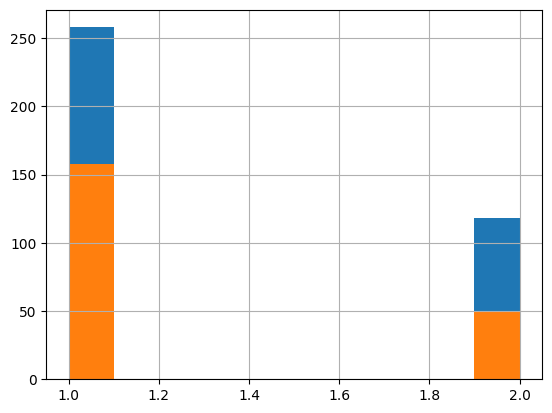

In [30]:
under50.Dataset.hist()
over50.Dataset.hist()
pass


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [39]:
data.size

6413

In [40]:
tb_m = data[data.Gender == 'Male']['Total_Bilirubin']
tb_f = data[data.Gender == 'Female']['Total_Bilirubin']
tb_all = data.Total_Bilirubin

<AxesSubplot:>

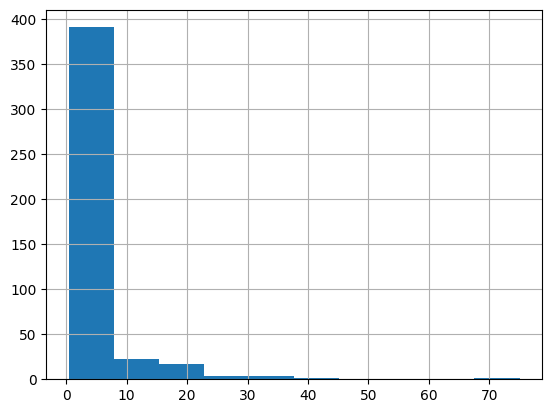

In [44]:
tb_m.hist()

<AxesSubplot:>

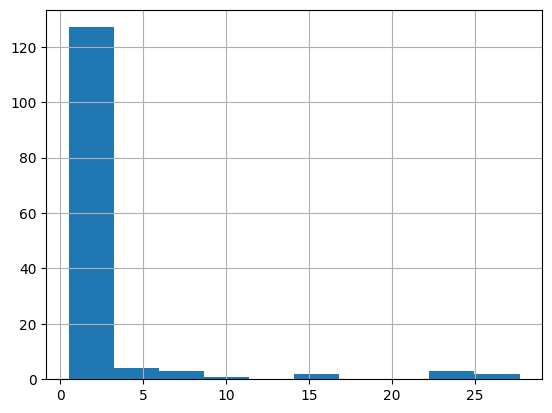

In [45]:
tb_f.hist()

In [37]:
tbil_mean = tbil.mean()
tball_mean = tball.mean()
tbil_mean, tball_mean

(4.164423076923077, 3.298799313893653)

In [47]:
tb_m.var(), tb_f.var()

(43.015644815501965, 23.65282189591449)

In [38]:

stats.ttest_1samp(tbil, tball_mean)

Ttest_1sampResult(statistic=2.471063305746645, pvalue=0.013871861207640133)

In [48]:
stats.mannwhitneyu(tb_m, tb_f)

MannwhitneyuResult(statistic=39722.5, pvalue=1.3196486638974717e-06)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

Посчитать статистическую значимость для трех выборок (по возрасту) -тест Anova - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [49]:
young = data[data.Age < 30].Dataset
midle = data[data.Age.between(30, 55)].Dataset
old = data[data.Age > 55].Dataset


In [51]:
stats.f_oneway(young, midle, old)

F_onewayResult(statistic=9.442269345117849, pvalue=9.217620204233869e-05)

In [52]:
stats.kruskal(young, midle, old)

KruskalResult(statistic=18.35212099773698, pvalue=0.0001034874199659921)

Вопросы задавать на почту yustiks@gmail.com